In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/imbich/Project-Machine-Learning/refs/heads/main/data/dataset.csv')
df.rename(columns = {'Nacionality':'Nationality'}, inplace = True)
df['Target'] = df['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

data = df.drop(['Target'], axis = 1)
label = df['Target']

In [3]:
# chia dữ liệu thành train và test
X_train, X_val, y_train, y_val = train_test_split(data, label, test_size=0.2, random_state=1)

# Chuẩn hóa
scaler = StandardScaler()
X_train_raw = scaler.fit_transform(X_train)
X_val_raw = scaler.transform(X_val)

In [4]:
# Mô hình phân loại KNN
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_raw, y_train)

print("KNN Classifier")

# Đánh giá trên tập train
y_train_pred = knn.predict(X_train_raw)
print("Train Accuracy:", round(accuracy_score(y_train, y_train_pred), 2))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))

# Đánh giá trên tập validation
y_val_pred = knn.predict(X_val_raw)
print("Validation Accuracy:", round(accuracy_score(y_val, y_val_pred), 2))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

KNN Classifier
Train Accuracy: 0.75
Train Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.68      0.76      1147
           1       0.59      0.26      0.36       627
           2       0.72      0.96      0.82      1765

    accuracy                           0.75      3539
   macro avg       0.73      0.63      0.65      3539
weighted avg       0.74      0.75      0.72      3539

Validation Accuracy: 0.72
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.64      0.73       274
           1       0.54      0.21      0.30       167
           2       0.69      0.95      0.80       444

    accuracy                           0.72       885
   macro avg       0.69      0.60      0.61       885
weighted avg       0.71      0.72      0.68       885



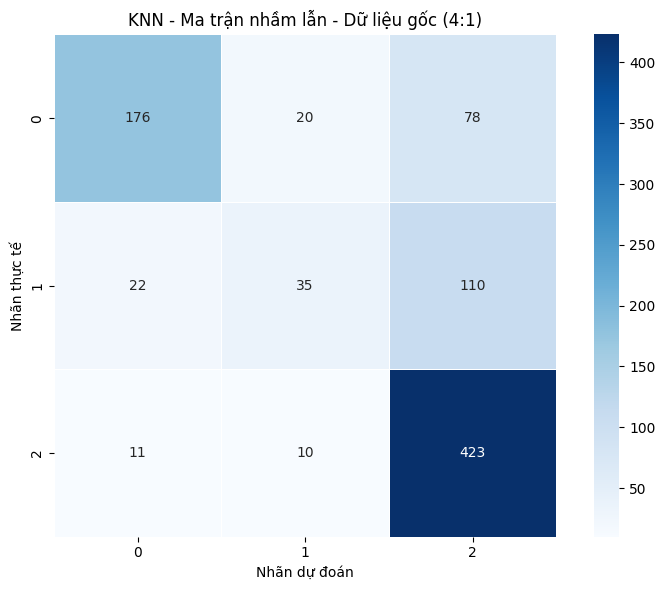

In [5]:
# Confusion Matrix KNN
# Tính confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Vẽ heatmap với lưới ô vuông
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True,
            xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))

plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực tế')
plt.title('KNN - Ma trận nhầm lẫn - Dữ liệu gốc (4:1)')
plt.tight_layout()
plt.show()


In [6]:
# Softmax regression
log_reg = LogisticRegression(max_iter=5000, random_state=0)
log_reg.fit(X_train, y_train)

print("Logistic Regression Classifier")

# Đánh giá trên tập train
y_train_pred = log_reg.predict(X_train)
print("Train Accuracy:", round(accuracy_score(y_train, y_train_pred), 2))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))

# Đánh giá trên tập validation
y_val_pred = log_reg.predict(X_val)
print("Validation Accuracy:", round(accuracy_score(y_val, y_val_pred), 2))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Logistic Regression Classifier
Train Accuracy: 0.78
Train Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      1147
           1       0.56      0.34      0.42       627
           2       0.79      0.93      0.86      1765

    accuracy                           0.78      3539
   macro avg       0.72      0.68      0.69      3539
weighted avg       0.76      0.78      0.76      3539

Validation Accuracy: 0.77
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       274
           1       0.55      0.34      0.42       167
           2       0.78      0.94      0.85       444

    accuracy                           0.77       885
   macro avg       0.73      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885



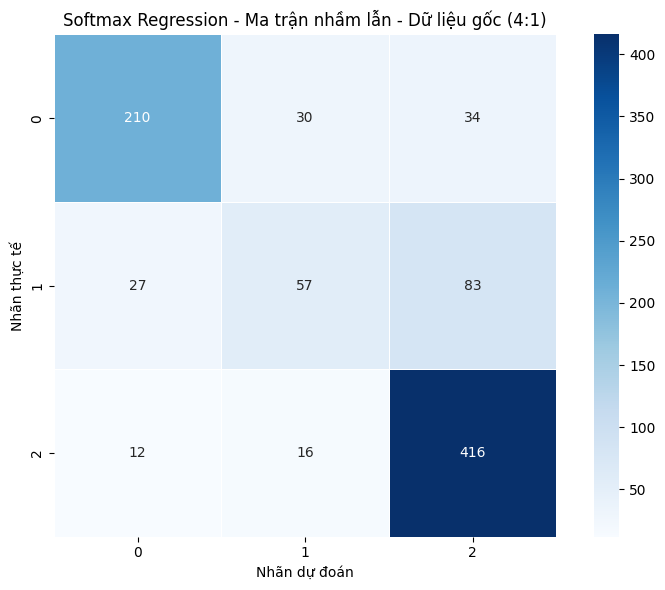

In [7]:
# Confusion Matrix Logistic Regression
# Tính confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Vẽ heatmap với lưới ô vuông
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True,
            xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))

plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực tế')
plt.title('Softmax Regression - Ma trận nhầm lẫn - Dữ liệu gốc (4:1)')
plt.tight_layout()
plt.show()
